# Predicting College Admission Chances for Candidates

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Input dataset
data = pd.read_csv("admissions.csv")
data.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   644 non-null    int64  
 1   gpa     644 non-null    float64
 2   gre     644 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.2 KB


In [6]:
data.shape

(644, 3)

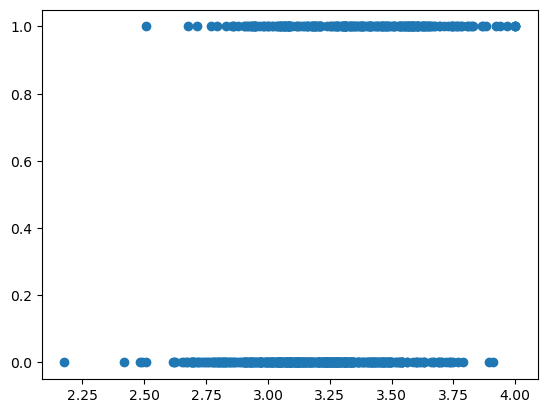

In [8]:
plt.scatter(data['gpa'],data['admit'])

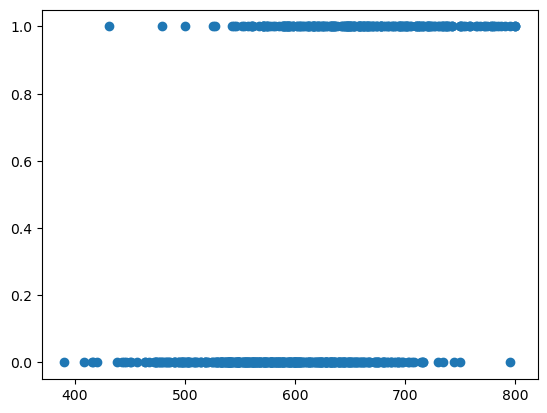

In [9]:
plt.scatter(data['gre'],data['admit'])

In [10]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(data[["gpa"]],data[["admit"]])

LinearRegression()

In [11]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logicm =LogisticRegression()
logicm.fit(data[["gpa"]],data[["admit"]])

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [12]:
pred_prob_gpa = logicm.predict_proba(data[["gpa"]])

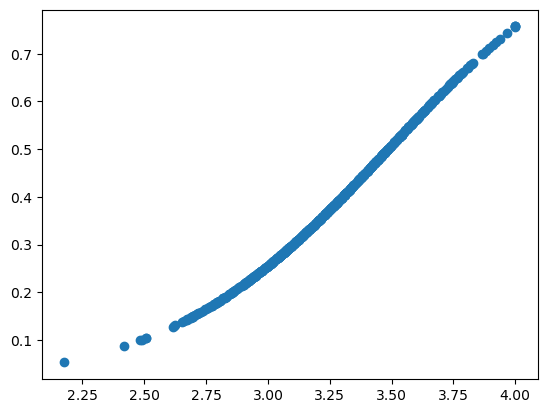

In [13]:
plt.scatter(data["gpa"],pred_prob_gpa[:,1])

In [14]:
fitted_gpa = logicm.predict(data[["gpa"]])

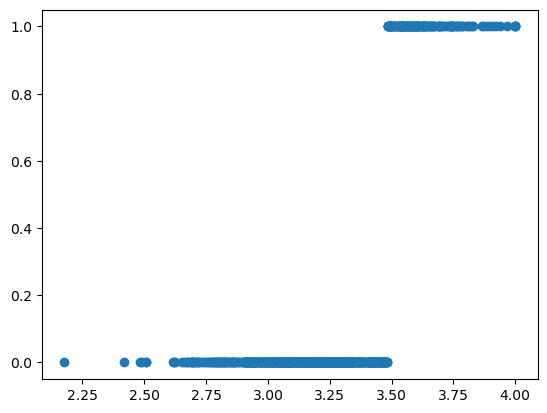

In [15]:
plt.scatter(data["gpa"],fitted_gpa)

In [16]:
#Logistic Regression model for GRE
from sklearn.linear_model import LogisticRegression
logicm1 =LogisticRegression()
logicm1.fit(data[["gre"]],data[["admit"]])

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
pred_prob_gre = logicm1.predict_proba(data[["gre"]])

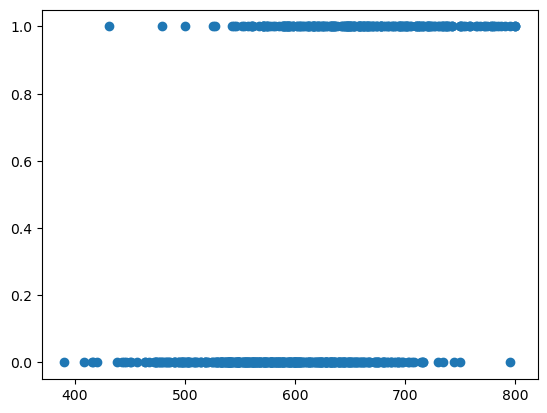

In [18]:
plt.scatter(data["gre"],data["admit"])

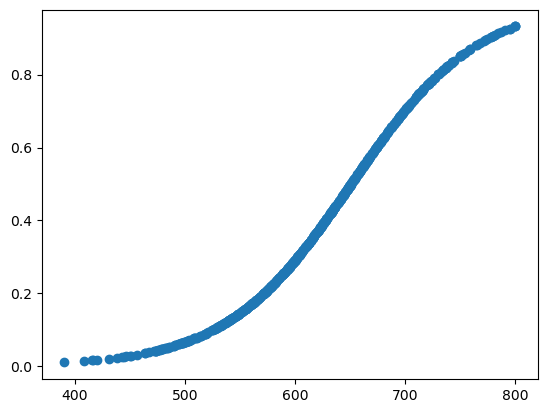

In [19]:
plt.scatter(data["gre"],pred_prob_gre[:,1])

In [20]:
fitted_gre = logicm1.predict(data[["gre"]])

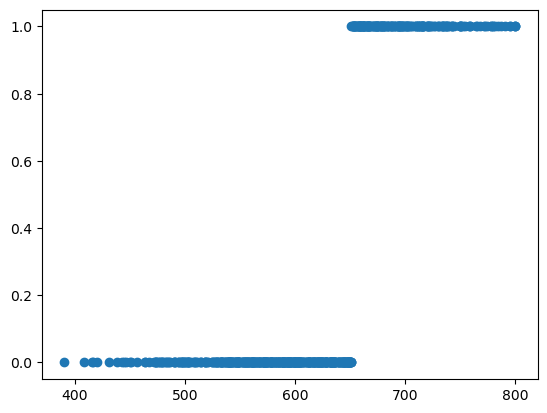

In [21]:
plt.scatter(data["gre"],fitted_gre)

# Comparing the Performance of model 

In [22]:
sum((fitted_gpa == data['admit'])/data.shape[0])

0.6847826086956457

In [23]:
sum((fitted_gre == data['admit'])/data.shape[0])

0.7267080745341543

# Combine model

In [24]:
logicm2 = LogisticRegression()
logicm2.fit(data[["gpa","gre"]], data["admit"])

LogisticRegression()

In [26]:
pred_prob_gregpa =logicm2.predict_log_proba(data[["gpa","gre"]])

In [27]:
fitted_gregpa = logicm2.predict(data[["gpa","gre"]])

In [28]:
#Acuracy
sum((fitted_gregpa == data['admit'])/data.shape[0])

0.7872670807453335